**08 이미지를 위한 인공 신경망**
====

**08-3 합성곱 신경망의 시각화**
----

**가중치 시각화**

In [12]:
# 8-2에서 만든 'best-cnn-model.keras' 불러오기

model = keras.Sequential()


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.keras',save_best_only=True)


In [13]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

In [14]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [15]:
# 첫 번째 합성곱 층의 가중치

conv = model.layers[0]     
print(conv.weights[0].shape, conv.weights[1].shape)    # 가중치와 절편

(3, 3, 1, 32) (32,)


In [16]:
import numpy as np

conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.037568554 0.26548302


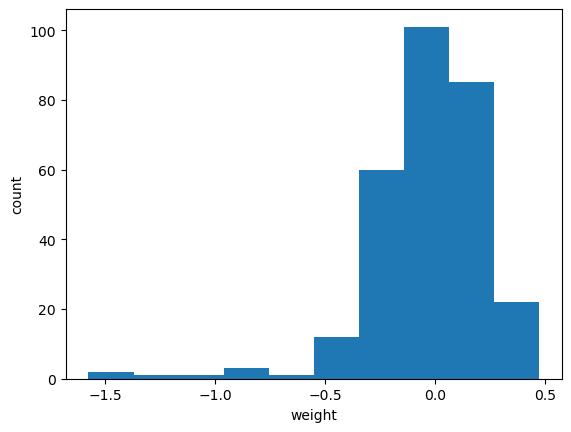

In [17]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달   
-> reshape로 1개의 열이 있는 배열로 변환   

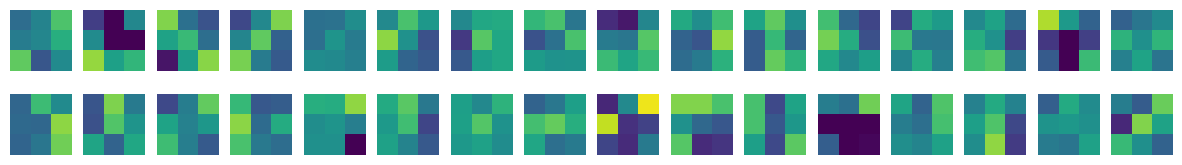

In [20]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [27]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28,28,1)))
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
    'relu', padding='same'))

In [28]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [29]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0015580618 0.082457796


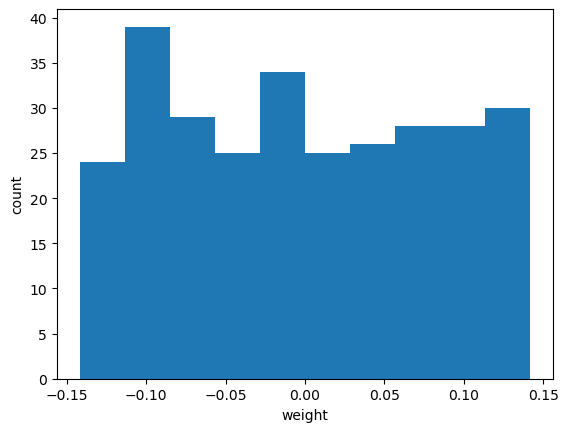

In [30]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

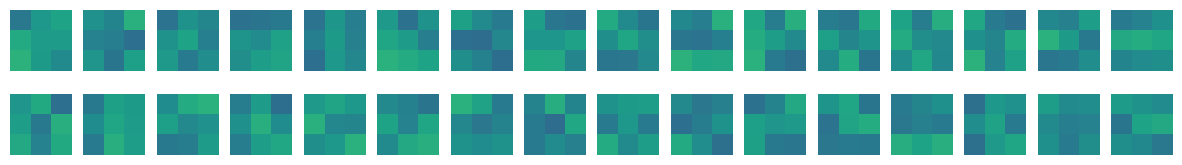

In [31]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [32]:
inputs = keras.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='relu')
dense2 = keras.layers.Dense(10, activation='softmax')

In [33]:
hidden = dense1(inputs)

In [34]:
outputs = dense2(hidden)

In [36]:
func_model=keras.Model(inputs, outputs)

In [37]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [38]:
conv_acti=keras.Model(model.inputs[0], model.layers[0].output)

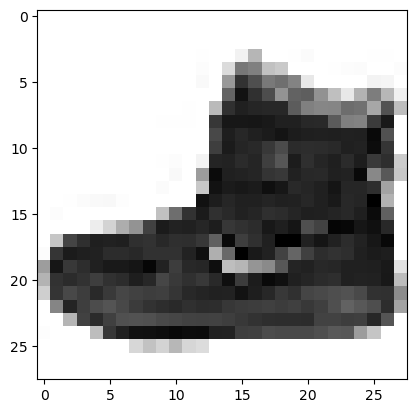

In [39]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [41]:
ankle_boot=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(ankle_boot)

I0000 00:00:1764252662.422112  141556 service.cc:148] XLA service 0x755ac40016e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764252662.422722  141556 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 4GB Laptop GPU, Compute Capability 8.6
2025-11-27 23:11:02.458256: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764252662.481995  141556 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


I0000 00:00:1764252663.427232  141556 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [42]:
print(feature_maps.shape)

(1, 28, 28, 32)


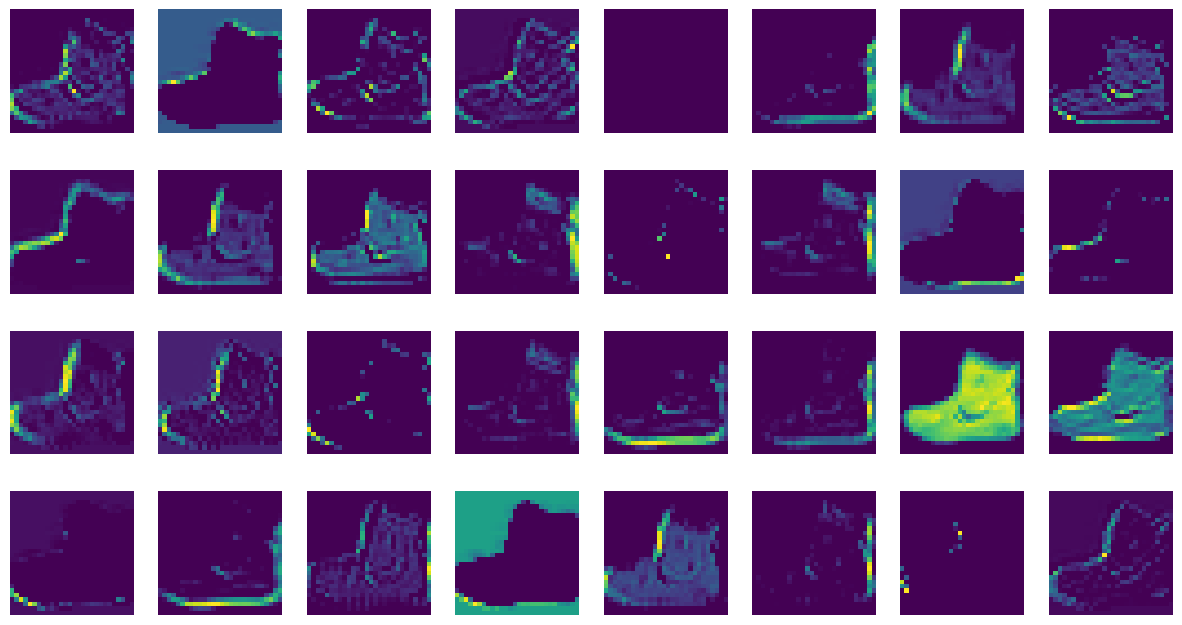

In [ ]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [44]:
conv2_acti=keras.Model(model.inputs[0],model.layers[2].output)

In [45]:
feature_maps=conv2_acti.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


In [46]:
print(feature_maps.shape)

(1, 14, 14, 64)


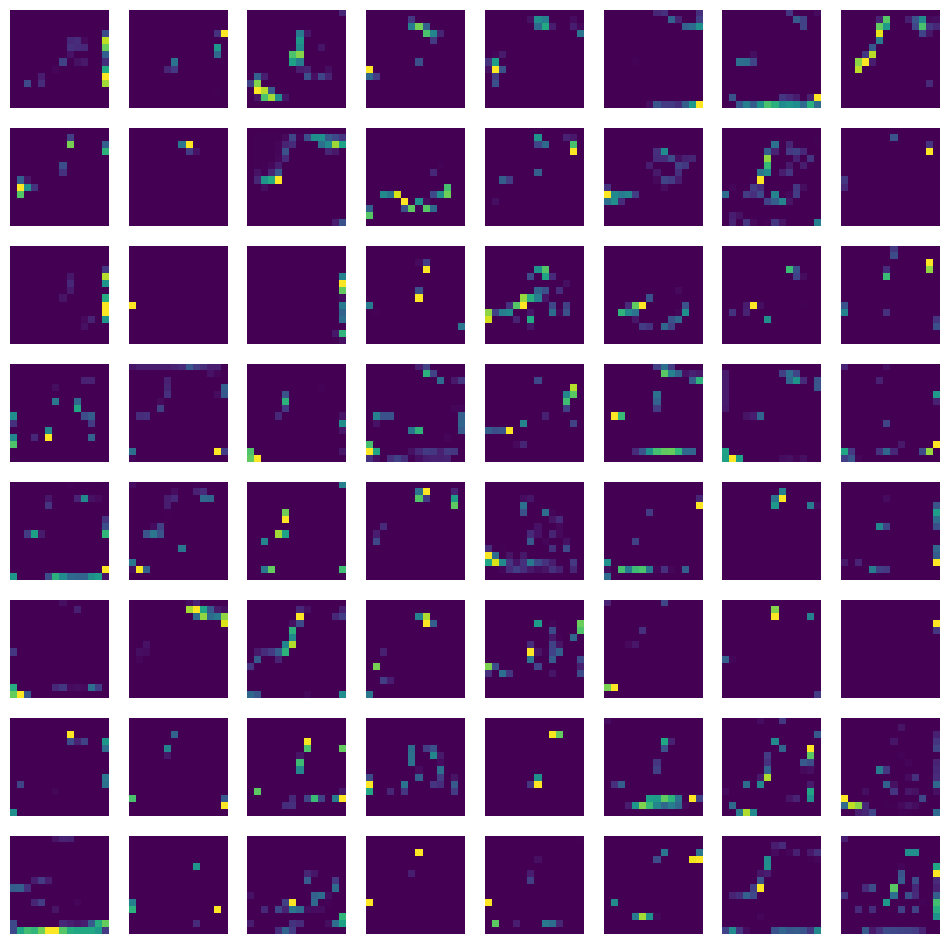

In [47]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()